In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [2]:
import sklearn
sklearn.__version__

'0.20.0'

In [56]:
data = pd.read_csv("final_cleaned_dataset.csv")

In [57]:
data.drop(['Tags'],axis=1, inplace=True)

In [58]:
data.head()

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,yes,3,-1,300,0,253,0,3664,135,-1,1,1,1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,no,2,1,155,1,256,0,6619,295,1,1,1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,yes,3,1,293,1,36,0,538000,44,-1,1,1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,no,3,1,150,0,58,0,717,80,-1,1,1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,yes,3,1,300,0,716,1,538000,51,-1,1,1,-1


In [59]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'dictionary_word',
       'targeted_brand', 'ext url', 'Phishing', 'Subdomains', 'Prefix-Suffix',
       'Anchor Tag', 'Forms', 'SSL Expiry Date', 'SSL Cert Check',
       'Alexa Ranking', 'URL Length', 'URL Shortened', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS'],
      dtype='object')

In [60]:
data[pd.isnull(data['Subdomains'])]

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS


In [62]:
features = [ 'Subdomains', 'Prefix-Suffix', 'Anchor Tag', 'Forms', 'SSL Cert Check', 'URL has HTTPS', ]

In [63]:
numerical_features = ['Subdomains', 'Anchor Tag']

In [64]:
for col in numerical_features:
    data[col] = scale(data[col].values)

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [65]:
X = data[features]

In [66]:
y = data['Phishing']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [69]:
neighbors = list(range(1,50,2))

In [70]:
cv_scores=[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append(scores.mean())

In [71]:
cv_scores

[0.9373154623154623,
 0.9359314296814297,
 0.9366064491064492,
 0.9303273115773114,
 0.9380050505050506,
 0.931041181041181,
 0.9338432400932399,
 0.9338432400932402,
 0.9310508935508934,
 0.9324397824397824,
 0.9345376845376846,
 0.9338383838383837,
 0.9282682595182594,
 0.9303467365967366,
 0.9247717560217559,
 0.9219939782439782,
 0.9226932789432789,
 0.9233925796425796,
 0.9247814685314685,
 0.9247814685314687,
 0.9261703574203575,
 0.9254710567210568,
 0.9233877233877233,
 0.9219939782439782,
 0.9240724553224553]

In [72]:
optimal_k = 9

In [73]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response

pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 9 is 94.200849%


In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
conf_matrix = confusion_matrix(y_test,pred)

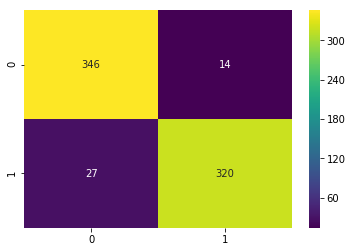

In [76]:
sns.heatmap(conf_matrix,annot=True, cmap='viridis', fmt='g')

In [77]:
X_train.columns

Index(['Subdomains', 'Prefix-Suffix', 'Anchor Tag', 'Forms', 'SSL Cert Check',
       'URL has HTTPS'],
      dtype='object')

In [79]:
X_train['Forms'].value_counts()

1    733
0    702
Name: Forms, dtype: int64

In [99]:
old_data = pd.read_csv('final_dataset.csv')

In [110]:
old_data['Anchor Tag'][1]

'155.3191489'

In [101]:
old_data['Subdomains'].mean()

2.7760149323378442

In [111]:
(155.319 - 215.22)/90.4

-0.6626216814159293

In [114]:
from sklearn.externals import joblib

In [116]:
joblib.dump(knn_optimal, 'classifier3.pkl')

['classifier3.pkl']